# Домашнее задание 3. Свёрточные и рекуррентные нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача генерации</th>
            <th colspan=5>Задача классификации</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th style="background-color:red; color:white">C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td style="background-color:red; color:white">L</td>
            <td>6</td>
            <td>7</td>
            <td style="background-color:red; color:white">8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача классификации картинок**

A. [Набор данных "Fashion MNIST"](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) `torchvision.datasets.FashionMNIST train=True и False`

B. [Набор данных "Текстуры"](https://pytorch.org/vision/main/generated/torchvision.datasets.DTD.html#torchvision.datasets.DTD) `torchvision.datasets.DTD split='train' и 'test'`

C. **[Набор данных "Буквы"](https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST)** `torchvision.datasets.EMNIST split=letters train=True и False`

D. [Набор данных "Кошки и собаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.OxfordIIITPet.html) `torchvision.datasets.OxfordIIITPet split = 'trainval' и 'test'` (объекты разбиты по породам (всего 37 пород), нужно построить бинарный классификатор собак и кошек)

E. [Набор данных "Дорожные знаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.GTSRB.html) `torchvision.datasets.GTSRB split = 'train' и 'test'`


---

**Задача генерации текстов**

K. [Набор данных "Евгений Онегин"]() `onegin.txt`

L. **[Набор данных "Война и Мир"]() `war_and_piece.txt`**

M. [Набор данных "Стихи"]() `stihi.csv`

N. [Набор данных "Сказки"]() `fairytales.txt`

O. [Набор данных "Новости"]() `news.txt` или https://github.com/yutkin/Lenta.Ru-News-Dataset/releases

# 0. Инициализация библиотек

In [2]:
import torch
import torchvision
import numpy as np
import pandas as pd
import torch.nn as nn
from torch import optim
from os.path import exists
import kornia.augmentation as K
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchsummary import summary
from torch.autograd import Variable
import matplotlib.animation as animation
import torchvision.transforms as transforms

Подсказка по разделению пород на два класса
```
import torchvision

# Все классы
len(torchvision.datasets.OxfordIIITPet(root='data_train', download=True).classes)

# кошки
cats = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Egyptian Mau', 'Maine Coon', 'Persian', 'Ragdoll', 'Russian Blue', 'Siamese', 'Sphynx']

# собаки
dogs = ['American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Boxer', 'Chihuahua', 'English Cocker Spaniel', 'English Setter', 'German Shorthaired', 'Great Pyrenees',
        'Havanese', 'Japanese Chin', 'Keeshond', 'Leonberger', 'Miniature Pinscher', 'Newfoundland', 'Pomeranian', 'Pug', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu',
        'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier']
```

# 1. Свёрточная нейронная сеть для классификации изображений (9 баллов)

## 1.1 Загрузка данных, разделение на train и test

Загрузите данные при помощи torchvision.datasets. Можете предусмотреть опредлённые транфсофрмации картинки, например, изменение размера до 128 px, кроп по центру в 196 px и преобразование к классу torch.Tensor:

```
import torchvision


transform = torchvision.transforms.Compose([
    # resize
    torchvision.transforms.Resize(128),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.ToTensor()
])
```

In [84]:
transform = transforms.Compose([
	transforms.Resize(24),
	transforms.CenterCrop(32),
	transforms.ToTensor()
])

In [85]:
data_train = torchvision.datasets.EMNIST(
	root = './data/sets/letters/', 
	split = "letters", 
	train = True, 
	download = True,
	transform = transform
)

data_test = torchvision.datasets.EMNIST(
	root = './data/sets/letters/', 
	split = "letters", 
	train = False, 
	download = True,
	transform = transform
)

In [86]:
nbatch = 16
trainset = torch.utils.data.DataLoader(
	data_train, 
	batch_size = nbatch, 
	shuffle = True,
	num_workers=2
)
testset = torch.utils.data.DataLoader(
	data_test, 
	batch_size = nbatch, 
	shuffle = False,
	num_workers=2
) 

z p s r g d e b o s n y p c q p


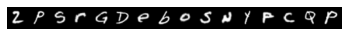

In [87]:
def imshow(img):
    npimg = img.numpy()
    plt.axis("off")
    npimg = np.transpose(npimg,(2, 1, 0))
    plt.imshow(npimg)
    plt.show
    
dataiter = iter(trainset)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow = 1))

print(" ".join(str(data_train.classes[labels[j]]) for j in range(nbatch)))

## 1.2 Предобработка данных (по необходимости)

## 1.3 Инициализация объекта свёрточной нейронной сети

Создайте нейронную сеть с 2-4 свёрточными слоями. В остальном конфигурация сети может быть произвольной. 

In [88]:
class EmptyLayer(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return x

In [146]:
class CNN(nn.Module):
	def __init__(self, regularization:dict = None):
		super(CNN, self).__init__()
		self.conv1 = nn.Sequential(
			nn.Conv2d(
				in_channels = 1, 
				out_channels = 32, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				32, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.ReLU(),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			),
		)
		self.conv2 = nn.Sequential(
			nn.Conv2d(
				in_channels = 32, 
				out_channels = 64, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				64, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.ReLU(),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			),
		)
		self.conv3 = nn.Sequential(
			nn.Conv2d(
				in_channels = 64, 
				out_channels = 128, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				128, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.ReLU(),
			nn.Conv2d(
				in_channels = 128, 
				out_channels = 256, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				256, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.ReLU(),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			),
		)
		self.out = nn.Sequential(
			nn.Linear(256 * 4 * 4, 1024),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.Dropout(p = regularization['p']),
			nn.Linear(1024, 512),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.Dropout(p = regularization['p']),
			nn.Linear(512, 27),
		)
			
	
	def forward(self, x):
		x = self.conv1(x)
		x = self.conv2(x)
		x = self.conv3(x)
		# flatten the output of conv2 to (batch_size, 32 * 7 * 7)
		x = x.view(x.size(0), -1)       
		output = self.out(x)
		return output, x    # return x for visualization		
		


In [136]:
cnn = CNN()
cnn.cuda()
summary(cnn, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          320
|    └─EmptyLayer: 2-2                   [-1, 32, 32, 32]          --
|    └─ReLU: 2-3                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-5                       [-1, 64, 16, 16]          18,496
|    └─EmptyLayer: 2-6                   [-1, 64, 16, 16]          --
|    └─ReLU: 2-7                         [-1, 64, 16, 16]          --
|    └─MaxPool2d: 2-8                    [-1, 64, 8, 8]            --
├─Sequential: 1-3                        [-1, 256, 4, 4]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           73,856
|    └─EmptyLayer: 2-10                  [-1, 128, 8, 8]           --
|    └

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          320
|    └─EmptyLayer: 2-2                   [-1, 32, 32, 32]          --
|    └─ReLU: 2-3                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-5                       [-1, 64, 16, 16]          18,496
|    └─EmptyLayer: 2-6                   [-1, 64, 16, 16]          --
|    └─ReLU: 2-7                         [-1, 64, 16, 16]          --
|    └─MaxPool2d: 2-8                    [-1, 64, 8, 8]            --
├─Sequential: 1-3                        [-1, 256, 4, 4]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           73,856
|    └─EmptyLayer: 2-10                  [-1, 128, 8, 8]           --
|    └

## 1.4 Обучение свёрточной нейронной сети для решения задачи классификации

In [137]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(cnn.parameters(), lr=0.0001)

In [173]:
def train(num_epochs, cnn, train_set, dumpName: str, transformation = None):
	
	cnn.train()
		
	# Train the model
	__total_step = len(train_set)
	__lossHistory = []
	__accurHistory = []
	print ("{:^13} {:^10} {:^10}".format('Epoch', 'Loss', 'Accuracy'))	
	for epoch in range(num_epochs):
		__running_loss = 0
		__correct_pred = 0
		__total_pred = 0
		for i, (images, labels) in enumerate(train_set):
			if transformation is not None:
				images = transformation(images)
			# gives batch data, normalize x when iterate train_loader
			b_x = Variable(images.cuda())   # batch x
			b_y = Variable(labels.cuda())   # batch y
			output = cnn(b_x)[1]            
			loss = loss_func(output, b_y)
			# clear gradients for this training step   
			optimizer.zero_grad()           
			# 
			_, predicted = output.max(1)
			__running_loss += loss.item()
			__total_pred += labels.size(0)
			__correct_pred += predicted.eq(b_y).sum().item()
			# backpropagation, compute gradients 
			loss.backward()                # apply gradients             
			optimizer.step()                
		pass
		__train_loss = __running_loss/__total_step
		__accuracy = 100.*__correct_pred/__total_pred
		__lossHistory.append(__train_loss)
		__accurHistory.append(__accuracy)
		print ("[{:>5}/{:<5}] {:^10.4f} {:^10.4f}".format(epoch + 1, num_epochs, __train_loss, __accuracy))
	pass
	torch.save(cnn.state_dict(), f'./data/dumps/{dumpName}.dump')
	return __lossHistory, __accurHistory
	

    Epoch        Loss     Accuracy 
[    1/2    ]   0.6041    81.6747  
[    2/2    ]   0.5382    83.5080  


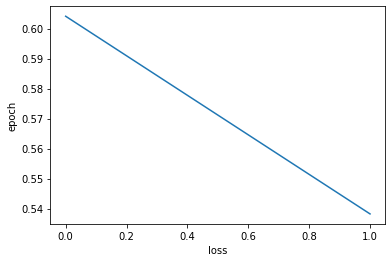

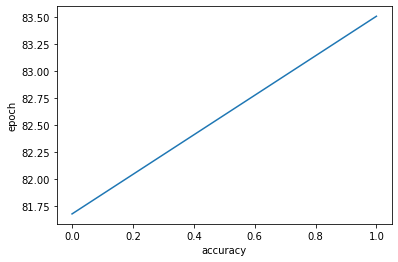

In [172]:
num_epochs = 2
loadAndTrain = True
if  not loadAndTrain and exists('./data/dumps/cnn_1.dump'):
	cnn.load_state_dict(torch.load('./data/dumps/cnn_1.dump'))
else:
	if loadAndTrain and exists('./data/dumps/cnn_1.dump'):
		cnn.load_state_dict(torch.load('./data/dumps/cnn_1.dump'))
	trainLoss, trainAccuracy = train(num_epochs, cnn, trainset, 'cnn_1')
	plt.plot(trainLoss)
	plt.xlabel('loss')
	plt.ylabel('epoch')
	plt.show()
	plt.plot(trainAccuracy)
	plt.xlabel('accuracy')
	plt.ylabel('epoch')
	plt.show()

In [140]:
def test(test_set):
    # Test the model
    cnn.eval()
    __accuracy_list = []

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_set:
            test_output, last_layer = cnn(images.cuda())
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels.cuda()).sum().item() / float(labels.cuda().size(0))
            __accuracy_list.append(accuracy)
            pass
        print(f'Проверка точности модели на {len(test_set) * nbatch} тестовых изображениях: {np.average(__accuracy_list)}')
    pass
    return __accuracy_list

Проверка точности модели на 20800 тестовых изображениях: 0.9055288461538461


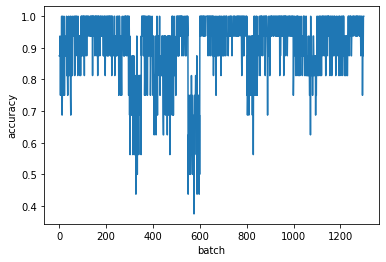

In [141]:
accuracy = test(testset)
plt.plot(accuracy)
plt.xlabel('batch')
plt.ylabel('accuracy')
plt.show()

## 1.5 Агументация данных и регулряизация нейросети

Попобуйте добавить аугументацию (случайные повороты, увеличение, уменьшение) в данные, а также регуляризацию (Drop out и Batch Norm слои) в модель. Как меняется метрика accuracy на обучающей и тестовой выборке в процессе обучения? Постройте график.

In [142]:
randTransform = K.AugmentationSequential(
	K.RandomPerspective(),
	K.RandomAffine(degrees=(-180, 180), scale = (0.5, 1)),
	K.RandomResizedCrop((32,32), scale = (0.2, 1)),
	K.RandomCrop((32,32), padding = 4),
	K.RandomVerticalFlip(),
	K.RandomHorizontalFlip(),
	data_keys = ["Input"],
	random_apply = (1,),
	same_on_batch = False
)

i c f v h k m h p u p o u a s s


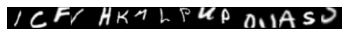

In [174]:
dataiter = iter(trainset)
images, labels = dataiter.next()
images = randTransform(images)

imshow(torchvision.utils.make_grid(images, nrow = 1))

print(" ".join(str(data_train.classes[labels[j]]) for j in range(nbatch)))

In [147]:
cnnR = CNN(
	regularization={
		'eps': 0.00001,		# default 'eps': 0.00001
		'momentum': 0.1, 	# default 'momentum': 0.1
		'p': 0.5			# default 'p': 0.5
	}
)
cnnR.cuda()
summary(cnnR, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          320
|    └─BatchNorm2d: 2-2                  [-1, 32, 32, 32]          64
|    └─ReLU: 2-3                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-5                       [-1, 64, 16, 16]          18,496
|    └─BatchNorm2d: 2-6                  [-1, 64, 16, 16]          128
|    └─ReLU: 2-7                         [-1, 64, 16, 16]          --
|    └─MaxPool2d: 2-8                    [-1, 64, 8, 8]            --
├─Sequential: 1-3                        [-1, 256, 4, 4]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           73,856
|    └─BatchNorm2d: 2-10                 [-1, 128, 8, 8]           256
|   

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          320
|    └─BatchNorm2d: 2-2                  [-1, 32, 32, 32]          64
|    └─ReLU: 2-3                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-5                       [-1, 64, 16, 16]          18,496
|    └─BatchNorm2d: 2-6                  [-1, 64, 16, 16]          128
|    └─ReLU: 2-7                         [-1, 64, 16, 16]          --
|    └─MaxPool2d: 2-8                    [-1, 64, 8, 8]            --
├─Sequential: 1-3                        [-1, 256, 4, 4]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           73,856
|    └─BatchNorm2d: 2-10                 [-1, 128, 8, 8]           256
|   

## 1.6 Обучение нейросети на данных с аугументацией 

    Epoch        Loss     Accuracy 
[    1/2    ]   8.6932     0.0144  
[    2/2    ]   8.6922     0.0096  


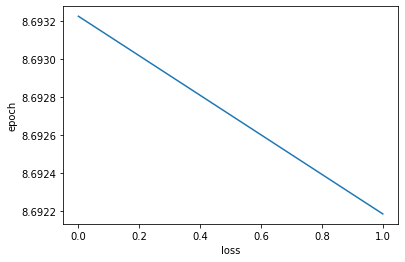

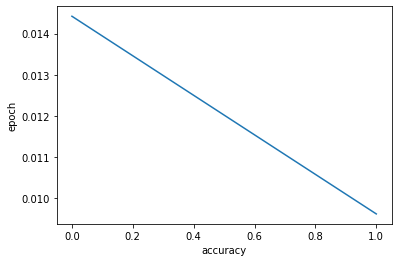

In [175]:
num_epochs = 2
loadAndTrain = False
if  not loadAndTrain and exists('./data/dumps/cnn_2.dump'):
	cnnR.load_state_dict(torch.load('./data/dumps/cnn_2.dump'))
else:
	if loadAndTrain and exists('./data/dumps/cnn_2.dump'):
		cnnR.load_state_dict(torch.load('./data/dumps/cnn_2.dump'))
	trainLoss,trainAccuracy = train(num_epochs, cnnR, trainset, 'cnn_2', randTransform)
	plt.plot(trainLoss)
	plt.xlabel('loss')
	plt.ylabel('epoch')
	plt.show()
	plt.plot(trainAccuracy)
	plt.xlabel('accuracy')
	plt.ylabel('epoch')
	plt.show()

Проверка точности модели на 20800 тестовых изображениях: 0.07807692307692307


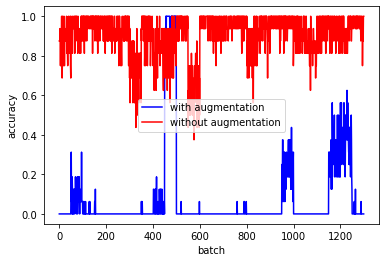

In [176]:
accuracyWithAug = test(testset)
plt.plot(accuracyWithAug, color='b', label='with augmentation')
plt.plot(accuracy, color='r', label='without augmentation')
plt.xlabel('batch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## 1.7 Выводы

> Что удалось попробовать? Что получилось, а что — нет? Повлияло ли добавление аугументации на качество?

В ходе выполения задания была создана структура свёрточной нейронной сети, основой которой послужила AlexNet. Обучение собственной нейронной сети дало результаты, представленные на графиках. Регуляриязация приводит к тому, что увеличивается точноть классификации, что в совокупности с аугментацией тренировочных датасетов даёт преимущество.

# 2. Рекуррентная нейронная сеть для генерации текстов (9 баллов)

## 2.1 Загрузка данных



## 2.2 Преодбработка/нормализация данных по необходимости

Например, можно привести все слова к нижнему регистру

## 2.3 Инициализация объекта рекуррентной нейронной сети

## 2.4 Обучение обычной рекуррентной нейронной сети

## 2.5 Генерация текстов при помощи обычной рекуррентной сети

## 2.6 Обучение рекуррентной нейронной сети с LSTM-ячейками

## 2.7 Генерация текстов с разной температурой

Попробуйте сгенерировать тексты с температурой из списка: `[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]` (см. нотубук с семинара по RNN)

## 2.8 Выводы